# 第七章 支持向量机SVM

## 7.1

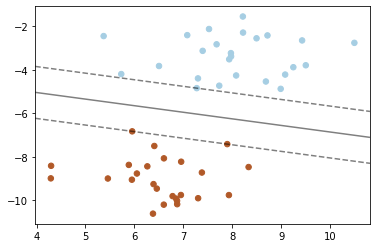

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 6)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X ,y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
          linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=100,
          linewidth=1, facecolors='none')
plt.show()

## 7.2 

E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


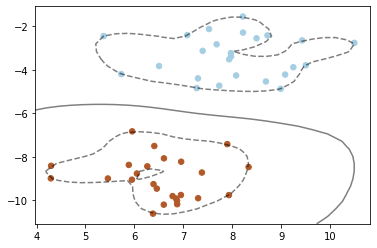

In [11]:
clf_rbf =svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax=plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
          linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=100,
          linewidth=1, facecolors='none')
plt.show()

E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


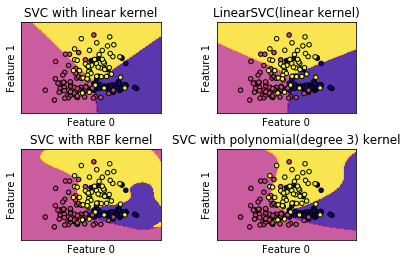

In [13]:
from sklearn.datasets import load_wine
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

wine = load_wine()
X = wine.data[:, :2]
y = wine.target

C = 1.0
models = (svm.SVC(kernel='linear', C=C),
         svm.LinearSVC(C=C),
         svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel',
         'LinearSVC(linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial(degree 3) kernel')
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
xx,yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap = plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

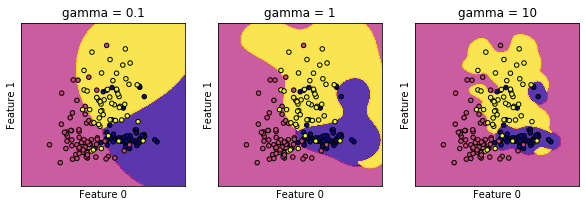

In [14]:
C = 1.0
models = (svm.SVC(kernel='rbf', gamma = 0.1, C=C),
         svm.SVC(kernel='rbf', gamma = 1, C=C),
         svm.SVC(kernel='rbf', gamma = 10, C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('gamma = 0.1',
          'gamma = 1',
          'gamma = 10')

fig, sub = plt.subplots(1, 3, figsize = (10, 3))

X0, X1 = X[:, 0], X[:, 1]
xx,yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap = plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## 7.3

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [16]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
from sklearn.model_selection import train_test_split
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
print('\n\n\n代码运行结果：')
print('==============')
print(X_train.shape)
print(X_test.shape)
print('==============')
print('\n\n\n')




代码运行结果：
(379, 13)
(127, 13)






In [19]:
from sklearn.svm import SVR
for kernel in('linear', 'rbf'):
    svr = SVR(kernel=kernel)
    svr.fit(X_train,y_train)
    print(kernel, '核函数的训练集得分：{:.3f}'.format(
        svr.score(X_train,y_train)))
    print(kernel, '核函数的测试集得分：{:.3f}'.format(
        svr.score(X_test,y_test)))
    

linear 核函数的训练集得分：0.709
linear 核函数的测试集得分：0.696
rbf 核函数的训练集得分：0.145
rbf 核函数的测试集得分：0.001


E:\Anaconda\Anaconda3\envs\env_1\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


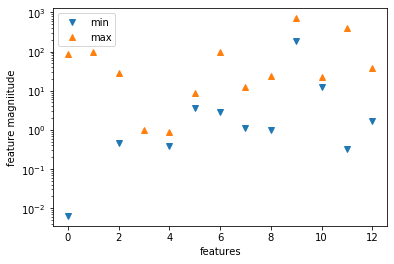

In [22]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc = 'best')
plt.xlabel('features')
plt.ylabel('feature magniitude')
plt.show()

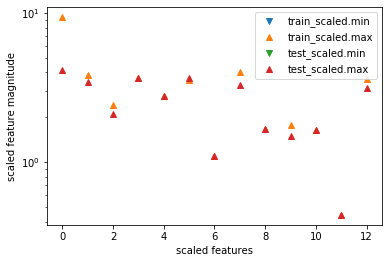

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.plot(X_train_scaled.min(axis=0),'v',label='train_scaled.min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train_scaled.max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test_scaled.min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test_scaled.max')
plt.yscale('log')
plt.legend(loc = 'best')
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
plt.show()


In [25]:
for kernel in('linear', 'rbf'):
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled,y_train)
    print('数据处理后',kernel, '核函数的训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled,y_train)))
    print('数据处理后',kernel, '核函数的测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled,y_test)))

数据处理后 linear 核函数的训练集得分：0.706
数据处理后 linear 核函数的测试集得分：0.698
数据处理后 rbf 核函数的训练集得分：0.665
数据处理后 rbf 核函数的测试集得分：0.695


In [26]:
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled,y_train)
print('调整参数后的模型在训练集得分：{:.3f}'.format(
    svr.score(X_train_scaled,y_train)))
print('调整参数后的模型在测试集得分：{:.3f}'.format(
    svr.score(X_test_scaled,y_test)))

调整参数后的模型在训练集得分：0.966
调整参数后的模型在测试集得分：0.894
